In [1]:
import re
import math
from collections import Counter
from typing import List, Tuple

from pymorphy2 import MorphAnalyzer
# from bedarev_analyzer import MorphAnalyzer

In [2]:
with open("./data/clear_text.txt", 'r', encoding='utf8') as fp:
    text = fp.read()

In [3]:
class NGrammer():
    morph = MorphAnalyzer()
    DELIMITERS = (',', '.', '!', '?', ':', ';')
    
    def __init__(self, text, min_count = 2):
        
        def nornalize_line(line):
            for delimiter in self.DELIMITERS:
                line = line.replace(delimiter, '\n')
            return [l for l in (self.normalize(phrase) for phrase in line.split('\n')) if l]
        
        normal_text = [l for l in (nornalize_line(line) for line in text.split('\n')) if l]
        self.min_count = max(2, min_count)
        self.dicts_all_n_gramms = []
        self.idf = {}
        inclusions = []
        
        MAX = max([max([len(l) for l in line]) for line in normal_text]) + 1
        for n in range(1, MAX):
            all_n_gramms = []
            inclusion = Counter()
            for i, line in enumerate(normal_text):
                line_n_gramms = []
                for phrase in line:
                    if len(phrase) < n:
                        continue
                    n_gramms = self.get_n_gramm(phrase, n)
                    if n_gramms:
                        line_n_gramms.extend(n_gramms)
                all_n_gramms.extend(line_n_gramms)
                inclusion += Counter(set(line_n_gramms))
            dict_all_n_gramms = {name: count for name, count in Counter(all_n_gramms).items() if name and count >= self.min_count}
            inclusions.append(inclusion)
            
            if not dict_all_n_gramms:
                break
            self.dicts_all_n_gramms.append(dict_all_n_gramms)

        self.idf = [{' '.join(words): math.log(len(normal_text)/count) for words, count in inclusion.items()}
                    for inclusion in inclusions]

    @classmethod
    def normalize(cls, line: str) -> List[str]:
        return [w for w in [cls.morph.parse(word)[0].normal_form for word in
                (v.lower() for v in re.findall(r"('?[а-яА-ЯёЁ][а-яА-ЯёЁ]*(?:-[а-яА-ЯёЁ]+)*'?)", line))] if w and w != ' ']

    @staticmethod
    def get_n_gramm(words: list, n: int = 2): 
        return [tuple(words[i-n+1:i+1]) for i in range(n - 1, len(words))]

    def max_n(self):
        return len(self.dicts_all_n_gramms) - 1

    def gramms(self, n=None):
        result = Counter()
        if n is None:
            for i in self.dicts_all_n_gramms[1:]:
                result += Counter(i)
        else:
            result = Counter(self.dicts_all_n_gramms[n-1])
        result = Counter({' '.join(key): value for key, value in result.items()})
        return result

In [4]:
%%time

grammer = NGrammer(text)

Wall time: 6min 15s


In [5]:
len(grammer.gramms())

264846

In [6]:
len(grammer.idf)

42

In [ ]:
set(grammer.idf[2].values())

In [110]:
set(grammer.idf[30].values())

{7.675236596594786, 8.08070170470295, 8.773848885262895}

In [ ]:
# 264860

In [117]:
grammer.idf[41]

{'условие стаж год далее далее далее далее наш наш наш наш половина мужской далее далее наш наш далее далее наш наш возраст год далее наш далее наш далее наш далее наш премия для пояснение смысл этот таблица привести пример эквивалентный программа на': 8.773848885262895,
 'действие индикатор условие стаж год далее далее далее далее наш наш наш наш половина мужской далее далее наш наш далее далее наш наш возраст год далее наш далее наш далее наш далее наш премия для пояснение смысл этот таблица привести пример эквивалентный': 8.773848885262895,
 'стаж год далее далее далее далее наш наш наш наш половина мужской далее далее наш наш далее далее наш наш возраст год далее наш далее наш далее наш далее наш премия для пояснение смысл этот таблица привести пример эквивалентный программа на кобол': 8.773848885262895,
 'индикатор условие стаж год далее далее далее далее наш наш наш наш половина мужской далее далее наш наш далее далее наш наш возраст год далее наш далее наш далее наш далее наш пр

In [118]:
grammer.idf[0]

{'потенциал': 3.9698278405296388,
 'показываться': 6.69440734358306,
 'давление': 3.7112538522359286,
 'для': 0.8096931664219582,
 'другой': 2.2755667357864615,
 'радиус': 4.803556971710774,
 'вычислениядавление': 8.08070170470295,
 'использование': 2.3489798613575075,
 'средний': 3.9375669783114176,
 'атом': 4.902647874355004,
 'атомать': 7.675236596594786,
 'с': 0.48079974549445137,
 'электронейтральный': 7.387554524143005,
 'вычисление': 3.5534930601845707,
 'уравнение': 2.1658482599668085,
 'например': 2.385287479717266,
 'работа': 1.2179437916515488,
 'рассматриваться': 2.996196562040239,
 'из': 1.5339162939424262,
 'выполняться': 4.569156265871929,
 'при': 1.2563280346598642,
 'заполнение': 6.134791555647637,
 'ограниченный': 4.262989378746045,
 'значение': 2.7031111572604054,
 'число': 2.504752601556634,
 'условие': 2.6063323943745544,
 'выражение': 4.24124939210964,
 'в': 0.0532251738424683,
 'равенство': 5.277341323796415,
 'иметь': 2.263590544739746,
 'термодинамический': 5.0

In [119]:
ALL_IDF = {}
for idf in grammer.idf:
    ALL_IDF.update(idf)


In [138]:
sorted([(n, v) for n, v in ALL_IDF.items() if 4 < v < 6.5 and ' ' in n], key=lambda x: x[1], reverse=True)


[('потенциал и', 6.47126379226885),
 ('с сильный', 6.47126379226885),
 ('можно добиться', 6.47126379226885),
 ('и е', 6.47126379226885),
 ('успех в', 6.47126379226885),
 ('год век', 6.47126379226885),
 ('лишь один', 6.47126379226885),
 ('о создание', 6.47126379226885),
 ('представляться в', 6.47126379226885),
 ('на равномерный', 6.47126379226885),
 ('этот теория', 6.47126379226885),
 ('данный исследование', 6.47126379226885),
 ('свободный граница', 6.47126379226885),
 ('уравнение сантиметр', 6.47126379226885),
 ('магнитный катушка', 6.47126379226885),
 ('мировой наука', 6.47126379226885),
 ('земля в', 6.47126379226885),
 ('определённый условие', 6.47126379226885),
 ('тело в', 6.47126379226885),
 ('кгд система', 6.47126379226885),
 ('цель исследование', 6.47126379226885),
 ('результат анализ', 6.47126379226885),
 ('быть дать', 6.47126379226885),
 ('идея и', 6.47126379226885),
 ('поэтому для', 6.47126379226885),
 ('по ося', 6.47126379226885),
 ('перенос энергия', 6.47126379226885),
 ('ск

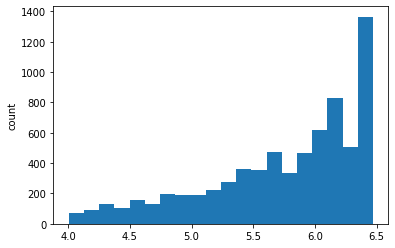

In [134]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
x = [v for v in ALL_IDF.values() if 4 < v < 6.5]
plt.hist(x, bins=20)
plt.ylabel('count')
plt.show()

In [126]:
{for name, count in grammer.gramms(1)}

Counter({'условие': 543,
         'термодинамический': 58,
         'согласованность': 24,
         'иметь': 733,
         'большой': 518,
         'значение': 529,
         'например': 654,
         'при': 2395,
         'использование': 700,
         'уравнение': 1273,
         'состояние': 419,
         'в': 19710,
         'газодинамический': 49,
         'расчёт': 867,
         'дать': 1455,
         'работа': 2572,
         'рассматриваться': 346,
         'вычисление': 214,
         'давление': 212,
         'модель': 1810,
         'ограниченный': 104,
         'атом': 67,
         'и': 13669,
         'показываться': 8,
         'что': 3014,
         'для': 4241,
         'вычислениядавление': 2,
         'формула': 157,
         'из': 1688,
         'равенство': 36,
         'выполняться': 75,
         'лишь': 185,
         'приближённо': 3,
         'выражение': 104,
         'потенциал': 153,
         'атомать': 3,
         'как': 2079,
         'ряд': 440,
         'другой

In [ ]:
ALL_FORMS

# Traunsform

In [31]:
ALL_FORMS = grammer.gramms(1) + grammer.gramms()
print(len(ALL_FORMS))

277382


In [ ]:
# 277382

In [151]:
result = [(n, len(n.split(' ')), v, round(ALL_IDF[n], 2))for n, v in ALL_FORMS.items()]

In [144]:
import json

In [153]:
import pandas as pd

In [156]:
res_df = pd.DataFrame(result, columns=['form', 'N', 'frequency', 'idf'])

In [168]:
res_df.head()

,form,N,frequency,idf
0,в,1,19710,0.05
1,бизнес-единица,1,7,7.16
2,повторно,1,2,8.08
3,сколь-либо,1,2,8.08
4,разве,1,2,8.08


In [175]:
sort_df = res_df.sort_values('form').sort_values('idf', ascending=False).sort_values('frequency', ascending=False)

In [4]:
# sort_df[sort_df.N == 3]

In [169]:
res_df = res_df.sort_values('form').sort_values('idf').sort_values('N')

In [170]:
res_df.reset_index(drop=True, inplace=True)

In [171]:
res_df.to_csv('./data/all_n_gramms.csv', index=None)

In [5]:
import pandas as pd

In [6]:
all_n_gramms = pd.read_csv('./data/all_n_gramms.csv')

In [12]:
20 /400

0.05

In [10]:
sum(all_n_gramms[all_n_gramms.N == 1].frequency.tolist())

418983

In [44]:
# & (all_n_gramms.frequency < 300)
# ['form'].tolist()
all_n_gramms[(all_n_gramms.N == 2) & (61 < all_n_gramms.frequency) ].sort_values('frequency')

,form,N,frequency,idf
62071,задача о,2,62,4.66
62545,в сша,2,62,4.77
62533,иметь место,2,62,4.70
62526,задача в,2,62,4.71
62066,или иной,2,63,4.68
62490,перенос излучение,2,63,4.77
62074,в экономика,2,63,4.66
62053,быть провести,2,64,4.63
62057,в такой,2,64,4.63
62076,в задача,2,64,4.66


In [ ]:
words_3 = """
модель ограниченный атом
одель протопланетный кольцо
в протопланетный диск
протопланетный диск солнце
продольный магнитный поль
образование планетный система
гравитационный манёвр
гравитационный неустойчивость протопланетный
космический аппарат
протопланетный кольцо




в основной капитал
инвестиция в основной
цена на нефть
добыча полезный ископаемое
в российский экономика
налог на прибыль
государственный регулирование
государственный управление
банковский система
транспортный поток
реальный сектор
полезный ископаемое
государственный служащий
орган власть
исполнительный власть
налоговый нагрузка
экономический рост
"""

In [ ]:
"""
по сравнение с
в соответствие с
с точка зрение
тем не менее
то время как
на наш взгляд
  включать в себя
  являться один из
не мочь быть
"""

In [9]:
grammer.max_n()

37